## Project Part 2 

This Part of the Project will use the complete COVID-19 Genome. This genome was provided by the galaxy project, and can be found here: https://covid19.galaxyproject.org/genomics/4-Variation/current_complete_ncov_genomes.fasta

### Tools
Biopython
Biopython was utilized during this assignment, and was installed using
pip install biopython

Also used in this project was virulign. Virulign can be found at: https://github.com/rega-cev/virulign

### Pulling Galaxy Project Data
The previously cited Galaxy project data was gathered using the following code:

In [3]:
import wget

url = 'https://covid19.galaxyproject.org/genomics/4-Variation/current_complete_ncov_genomes.fasta'
file = '../../current_complete_ncov_genomes.fasta'
wget.download(url, file)

'../../current_complete_ncov_genomes.fasta'

### Virus Alignment
When running virulign, I decided to compare the genome to the HIV-HXB2-env genome provided by virulign, because of all the rumors that have been spreading about the disease having a similar structure to HIV. I wanted to test how close the relation may be, and used the following commands to do so.

.\virulign .\HIV\HIV-HXB2-env.xml current_complete_ncov_genomes.fasta > alignment.mutations 2> alignment.err

### Read the data into a pandas dataframe

In [107]:
import pandas as pd
position_table = pd.read_csv('../../position_table.csv') # or put in the path to csc-448-project/data/position_table.csv

In [108]:
results = position_table.describe()
results

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
count,677,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677
unique,677,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,MT263404.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
freq,1,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677


In [109]:
position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,MT007544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,MT019529.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
2,MT019530.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,MT019531.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,MT019532.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,MT334544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
673,MT334546.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
674,MT334547.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
675,MT334557.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


### Pull out the concensus sequence

In [110]:
concensus_seq = position_table.drop('seqid',axis=1).mode(axis=0).T[0]
concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
           ..
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [111]:
position_table = position_table.set_index('seqid')

### Determine which samples are farthest from the concensus sequence

In [77]:
distance_from_concensus_seq = position_table.apply(lambda row: sum(row != concensus_seq),axis=1)
distance_from_concensus_seq_sorted = distance_from_concensus_seq.sort_values(ascending=False)
distance_from_concensus_seq_sorted

seqid
MT233522.1    82
MT308696.1    71
MT308694.1    53
MT263453.1    48
MT259284.1    33
              ..
MT326081.1     0
MT263395.1     0
MT263396.1     0
MT263398.1     0
MT262916.1     0
Length: 677, dtype: int64

### Select 10 sequences to do our first analysis

In [78]:
subset_seqs = distance_from_concensus_seq_sorted[:10].index
subset_seqs

Index(['MT233522.1', 'MT308696.1', 'MT308694.1', 'MT263453.1', 'MT259284.1',
       'MT293180.1', 'MT263436.1', 'MT293224.1', 'MT326129.1', 'MT259277.1'],
      dtype='object', name='seqid')

### Construct a distance matrix for our sequences

In [112]:
distances = {}
for i,seqid1 in enumerate(subset_seqs):
    distances[seqid1,seqid1]=0
    for j in range(i+1,len(subset_seqs)):
        seqid2 = subset_seqs[j]
        distances[seqid1,seqid2] = sum(position_table.loc[seqid1] != position_table.loc[seqid2])
        distances[seqid2,seqid1] = distances[seqid1,seqid2]
distances = pd.Series(distances).unstack()
distances

,MT233522.1,MT259277.1,MT259284.1,MT263436.1,MT263453.1,MT293180.1,MT293224.1,MT308694.1,MT308696.1,MT326129.1
MT233522.1,0,90,115,90,130,104,90,135,151,90
MT259277.1,90,0,43,2,58,32,2,63,79,0
MT259284.1,115,43,0,43,81,47,43,86,104,43
MT263436.1,90,2,43,0,58,32,0,63,79,2
MT263453.1,130,58,81,58,0,68,58,101,119,58
MT293180.1,104,32,47,32,68,0,32,77,93,32
MT293224.1,90,2,43,0,58,32,0,63,79,2
MT308694.1,135,63,86,63,101,77,63,0,22,63
MT308696.1,151,79,104,79,119,93,79,22,0,79
MT326129.1,90,0,43,2,58,32,2,63,79,0


### Utilize biopython
For this analysis we'll use a package called biopython: ``pip install biopython``. 

It has its own formats, so we'll need to convert.

In [113]:
from Bio.Phylo.TreeConstruction import DistanceMatrix
matrix = np.tril(distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm = DistanceMatrix(list(distances.index), matrix)

### Now construct our tree

In [114]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

### Now draw our tree

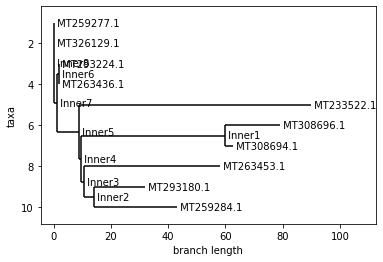

In [106]:
%matplotlib inline

from Bio import Phylo
tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

**Please see the guidance at the top of the page for what to try**